<a href="https://colab.research.google.com/github/financieras/big_data/blob/main/retos/reto_009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 9. Clasificación con regla simple**
- Crea regla: si petal_length < 2.5 → setosa, si < 5.0 → versicolor, sino → virginica
- Crea nueva columna 'prediccion' con esta regla
- Compara con columna 'species' real
- Calcula precisión: `(df['prediccion'] == df['species']).mean()`

# **Resolución del Reto 9**

### **Contexto del Dataset Iris**
- El dataset Iris contiene **150 muestras** de 3 especies de flores (setosa, versicolor, virginica)
- Tiene **4 características medidas**:
    - longitud del sépalo
    - ancho del sépalo
    - longitud del pétalo
    - ancho del pétalo
- Es el dataset clásico para problemas de clasificación multiclase.
- En este reto implementaremos un clasificador simple basado en reglas para el dataset Iris, utilizando únicamente la longitud del pétalo (`petal_length`) para predecir la especie de la flor.

## **Paso 1: Cargar dataset Iris desde Seaborn**
Importamos los datos de Iris que usaremos para nuestro experimento de clasificación.

In [17]:
# EJECUTA ESTE CÓDIGO PARA CARGAR IRIS
print("🌸 Paso 1: Cargando dataset Iris...")
import seaborn as sns
import pandas as pd

df = sns.load_dataset('iris')
print(f"✅ Dataset cargado - Dimensiones: {df.shape}")
df.head()

🌸 Paso 1: Cargando dataset Iris...
✅ Dataset cargado - Dimensiones: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **Paso 2: Crear regla de clasificación basada en petal_length**
Implementamos la regla de decisión especificada en el reto.

In [18]:
# EJECUTA ESTE CÓDIGO PARA CREAR LA REGLA DE CLASIFICACIÓN
print("🎯 Paso 2: Creando regla de clasificación...")

def clasificar_por_petalo(petal_length):
    if petal_length < 2.5:
        return 'setosa'
    elif petal_length < 5.0:
        return 'versicolor'
    else:
        return 'virginica'

# Aplicar la regla a cada fila del dataset
df['prediccion'] = df['petal_length'].apply(clasificar_por_petalo)

print("✅ Regla aplicada - Primera verificación:")
print(df[['species', 'petal_length', 'prediccion']].head(10))

🎯 Paso 2: Creando regla de clasificación...
✅ Regla aplicada - Primera verificación:
  species  petal_length prediccion
0  setosa           1.4     setosa
1  setosa           1.4     setosa
2  setosa           1.3     setosa
3  setosa           1.5     setosa
4  setosa           1.4     setosa
5  setosa           1.7     setosa
6  setosa           1.4     setosa
7  setosa           1.5     setosa
8  setosa           1.4     setosa
9  setosa           1.5     setosa


## **Paso 3: Comparar predicciones con valores reales**
Analizamos visualmente cómo se comparan nuestras predicciones con las especies reales.

In [19]:
# EJECUTA ESTE CÓDIGO PARA COMPARAR PREDICCIONES
print("🔍 Paso 3: Comparando predicciones con valores reales...")

# Crear tabla de comparación
comparacion = df[['species', 'prediccion']].copy()
comparacion['correcto'] = comparacion['species'] == comparacion['prediccion']

print("📊 Muestra de comparaciones:")
print(comparacion.head(15))

print(f"\n📈 Resumen de aciertos:")
print(comparacion['correcto'].value_counts())

🔍 Paso 3: Comparando predicciones con valores reales...
📊 Muestra de comparaciones:
   species prediccion  correcto
0   setosa     setosa      True
1   setosa     setosa      True
2   setosa     setosa      True
3   setosa     setosa      True
4   setosa     setosa      True
5   setosa     setosa      True
6   setosa     setosa      True
7   setosa     setosa      True
8   setosa     setosa      True
9   setosa     setosa      True
10  setosa     setosa      True
11  setosa     setosa      True
12  setosa     setosa      True
13  setosa     setosa      True
14  setosa     setosa      True

📈 Resumen de aciertos:
correcto
True     142
False      8
Name: count, dtype: int64


## **Paso 4: Calcular precisión del clasificador**
Calculamos la métrica de precisión para evaluar el rendimiento de nuestra regla simple.

In [20]:
# EJECUTA ESTE CÓDIGO PARA CALCULAR PRECISIÓN
print("📏 Paso 4: Calculando precisión del clasificador...")

precision = (df['prediccion'] == df['species']).mean()
print(f"🎯 Precisión del clasificador: {precision:.2%}")

# Detalle por especie
print(f"\n📊 Precisión por especie:")
for especie in df['species'].unique():
    mask = df['species'] == especie
    precision_especie = (df.loc[mask, 'prediccion'] == df.loc[mask, 'species']).mean()
    print(f"   {especie}: {precision_especie:.2%}")

📏 Paso 4: Calculando precisión del clasificador...
🎯 Precisión del clasificador: 94.67%

📊 Precisión por especie:
   setosa: 100.00%
   versicolor: 96.00%
   virginica: 88.00%


## **Paso 5: Análisis de los errores de clasificación**
Identificamos y analizamos los casos donde nuestra regla falló.

In [21]:
# EJECUTA ESTE CÓDIGO PARA ANALIZAR ERRORES
print("❌ Paso 5: Analizando errores de clasificación...")

errores = df[df['prediccion'] != df['species']]
print(f"📉 Número de errores: {len(errores)}")
print(f"📈 Tasa de error: {len(errores)/len(df):.2%}")

if len(errores) > 0:
    print("\n🔍 Detalle de errores:")
    print(errores[['species', 'petal_length', 'prediccion']])

    # Análisis de rangos problemáticos
    print(f"\n📊 Rango de petal_length en errores: {errores['petal_length'].min():.2f} - {errores['petal_length'].max():.2f}")

❌ Paso 5: Analizando errores de clasificación...
📉 Número de errores: 8
📈 Tasa de error: 5.33%

🔍 Detalle de errores:
        species  petal_length  prediccion
77   versicolor           5.0   virginica
83   versicolor           5.1   virginica
106   virginica           4.5  versicolor
121   virginica           4.9  versicolor
123   virginica           4.9  versicolor
126   virginica           4.8  versicolor
127   virginica           4.9  versicolor
138   virginica           4.8  versicolor

📊 Rango de petal_length en errores: 4.50 - 5.10


## **Paso 6: Visualización de la regla de decisión**
Creamos una visualización para entender mejor cómo funciona nuestra regla.

📊 Paso 6: Visualizando la regla de decisión...


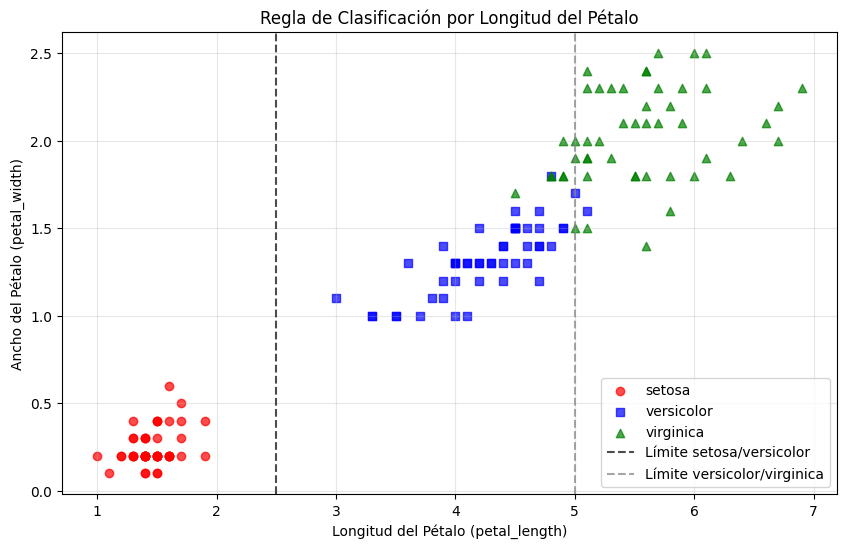

✅ Visualización completada


In [22]:
# EJECUTA ESTE CÓDIGO PARA VISUALIZAR LA REGLA
print("📊 Paso 6: Visualizando la regla de decisión...")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crear scatter plot coloreado por especie real
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
marker_types = {'setosa': 'o', 'versicolor': 's', 'virginica': '^'}

for especie in df['species'].unique():
    subset = df[df['species'] == especie]
    plt.scatter(subset['petal_length'], subset['petal_width'],
                c=colors[especie], marker=marker_types[especie],
                label=especie, alpha=0.7)

# Añadir líneas de decisión
plt.axvline(x=2.5, color='black', linestyle='--', alpha=0.7, label='Límite setosa/versicolor')
plt.axvline(x=5.0, color='gray', linestyle='--', alpha=0.7, label='Límite versicolor/virginica')

plt.xlabel('Longitud del Pétalo (petal_length)')
plt.ylabel('Ancho del Pétalo (petal_width)')
plt.title('Regla de Clasificación por Longitud del Pétalo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Visualización completada")

## **Paso 7: Resumen final del clasificador**
Generamos un reporte completo del rendimiento de nuestra regla simple.

In [23]:
# EJECUTA ESTE CÓDIGO PARA REPORTE FINAL
print("📋 Paso 7: Reporte final del clasificador")

print(f"""
🎯 RESUMEN DEL CLASIFICADOR POR REGLA SIMPLE

📊 Dataset: Iris ({len(df)} observaciones)
🎯 Variable utilizada: petal_length
📏 Regla de decisión:
   - petal_length < 2.5 → setosa
   - 2.5 ≤ petal_length < 5.0 → versicolor
   - petal_length ≥ 5.0 → virginica

📈 Resultados:
   ✅ Precisión total: {precision:.2%}
   ✅ Aciertos: {(df['prediccion'] == df['species']).sum()}
   ❌ Errores: {(df['prediccion'] != df['species']).sum()}

🔍 Análisis por especie:
""")

for especie in df['species'].unique():
    mask = df['species'] == especie
    total = mask.sum()
    correctos = (df.loc[mask, 'prediccion'] == df.loc[mask, 'species']).sum()
    precision_especie = correctos / total

    print(f"   {especie:>10}: {correctos:>2}/{total:>2} correctos → {precision_especie:.2%}")

print(f"\n🎉 ¡Reto 9 completado! Clasificador simple implementado con {precision:.2%} de precisión")

📋 Paso 7: Reporte final del clasificador

🎯 RESUMEN DEL CLASIFICADOR POR REGLA SIMPLE

📊 Dataset: Iris (150 observaciones)
🎯 Variable utilizada: petal_length
📏 Regla de decisión:
   - petal_length < 2.5 → setosa
   - 2.5 ≤ petal_length < 5.0 → versicolor  
   - petal_length ≥ 5.0 → virginica

📈 Resultados:
   ✅ Precisión total: 94.67%
   ✅ Aciertos: 142
   ❌ Errores: 8

🔍 Análisis por especie:

       setosa: 50/50 correctos → 100.00%
   versicolor: 48/50 correctos → 96.00%
    virginica: 44/50 correctos → 88.00%

🎉 ¡Reto 9 completado! Clasificador simple implementado con 94.67% de precisión


## 🎯 **Puntos clave del Reto 9**

Dominamos la implementación de un clasificador basado en reglas simples y evaluamos su rendimiento en el dataset Iris.

### **Competencias técnicas adquiridas**
1. **Implementación de reglas de decisión**: Creación de funciones de clasificación basadas en umbrales
2. **Aplicación de funciones a DataFrames**: Uso de `.apply()` para transformar columnas
3. **Evaluación de modelos**: Cálculo de precisión y análisis de errores
4. **Análisis por categorías**: Evaluación del rendimiento desglosado por clases
5. **Visualización de reglas de decisión**: Representación gráfica de los criterios de clasificación

### **Insight obtenido**
Este reto demuestra que incluso con una regla extremadamente simple basada en una sola característica (`petal_length`), podemos lograr una precisión notable en la clasificación de flores Iris, lo que subraya la importancia de seleccionar características discriminativas en problemas de machine learning.